# Getting started

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import ipywidgets as widgets
from IPython.display import display, JSON

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import GroupKFold
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

import holidays
import dateutil.easter as easter

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path1 = "/kaggle/input/playground-series-s3e19/"
df_sample = pd.read_csv(path1+"sample_submission.csv")
df_train = pd.read_csv(path1+"train.csv",index_col=[1],parse_dates=[1]).drop(columns="id")
df_test = pd.read_csv(path1+"test.csv",index_col=[1],parse_dates=[1]).drop(columns="id")

df_sample.head()

id  num_sold
0  136950       100
1  136951       100
2  136952       100
3  136953       100
4  136954       100

In [3]:
df_train.head(3)

country         store  \
date                                  
2017-01-01  Argentina  Kaggle Learn   
2017-01-01  Argentina  Kaggle Learn   
2017-01-01  Argentina  Kaggle Learn   

                                                   product  num_sold  
date                                                                  
2017-01-01               Using LLMs to Improve Your Coding        63  
2017-01-01                   Using LLMs to Train More LLMs        66  
2017-01-01  Using LLMs to Win Friends and Influence People         9

In [4]:
df_train['country'].unique(),df_test['country'].unique()

(array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object),
 array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object))

In [5]:
df_train['store'].unique(),df_test['store'].unique()

(array(['Kaggle Learn', 'Kaggle Store', 'Kagglazon'], dtype=object),
 array(['Kaggle Learn', 'Kaggle Store', 'Kagglazon'], dtype=object))

In [6]:
df_train['product'].unique(),df_test['product'].unique()

(array(['Using LLMs to Improve Your Coding',
        'Using LLMs to Train More LLMs',
        'Using LLMs to Win Friends and Influence People',
        'Using LLMs to Win More Kaggle Competitions',
        'Using LLMs to Write Better'], dtype=object),
 array(['Using LLMs to Improve Your Coding',
        'Using LLMs to Train More LLMs',
        'Using LLMs to Win Friends and Influence People',
        'Using LLMs to Win More Kaggle Competitions',
        'Using LLMs to Write Better'], dtype=object))

In [7]:
df_train.index, df_test.index

(DatetimeIndex(['2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
                '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
                '2017-01-01', '2017-01-01',
                ...
                '2021-12-31', '2021-12-31', '2021-12-31', '2021-12-31',
                '2021-12-31', '2021-12-31', '2021-12-31', '2021-12-31',
                '2021-12-31', '2021-12-31'],
               dtype='datetime64[ns]', name='date', length=136950, freq=None),
 DatetimeIndex(['2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
                '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
                '2022-01-01', '2022-01-01',
                ...
                '2022-12-31', '2022-12-31', '2022-12-31', '2022-12-31',
                '2022-12-31', '2022-12-31', '2022-12-31', '2022-12-31',
                '2022-12-31', '2022-12-31'],
               dtype='datetime64[ns]', name='date', length=27375, freq=None))

In [8]:
df_train.shape, df_test.shape

((136950, 4), (27375, 3))

# Exploratory Data Analysis

## Trend of sales over time on daily basis

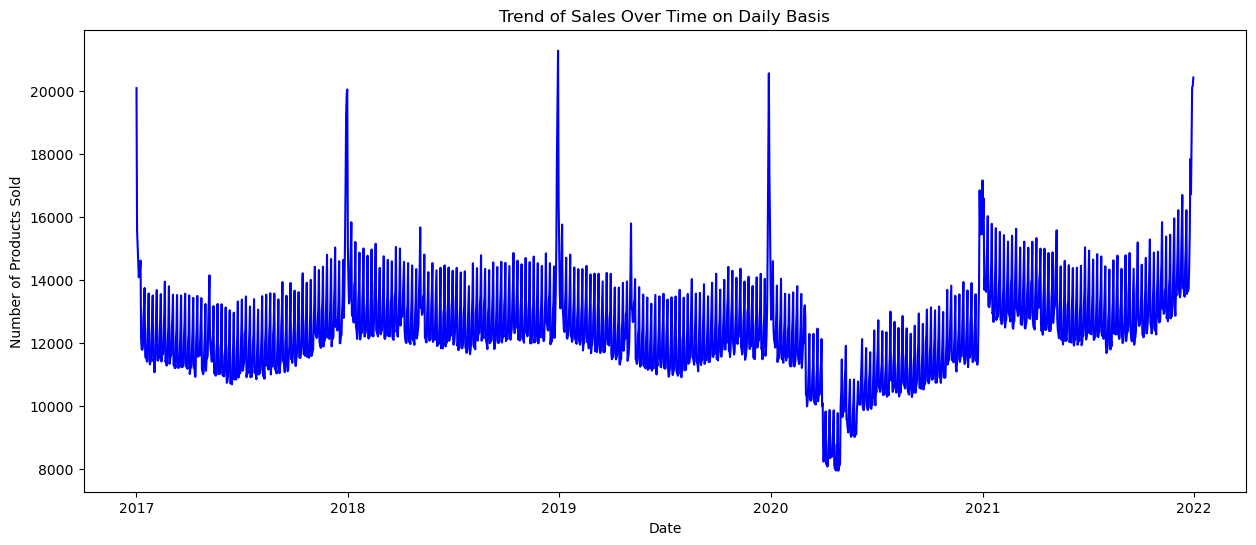

In [9]:
# Aggregate sales on a daily basis
daily_sales = df_train.resample('D').sum()['num_sold']

# Plot the trend of sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, color='b')
plt.title('Trend of Sales Over Time on Daily Basis')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.show()

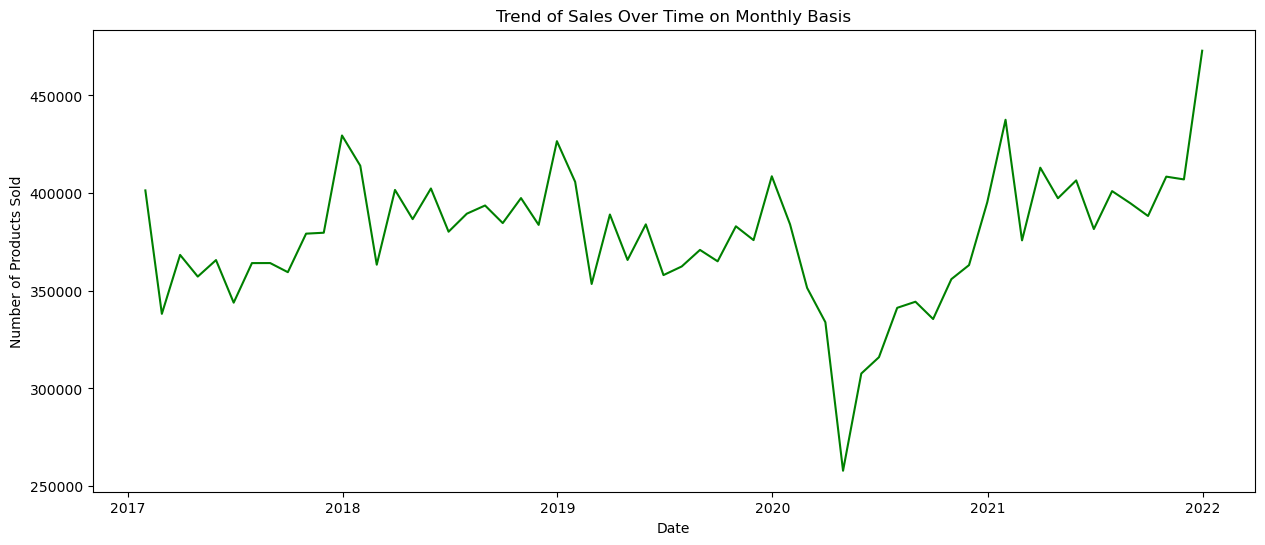

In [10]:
# Aggregate sales on a monthly basis
monthly_sales = df_train.resample('M').sum()['num_sold']

# Plot the trend of sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='g')
plt.title('Trend of Sales Over Time on Monthly Basis')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.show()

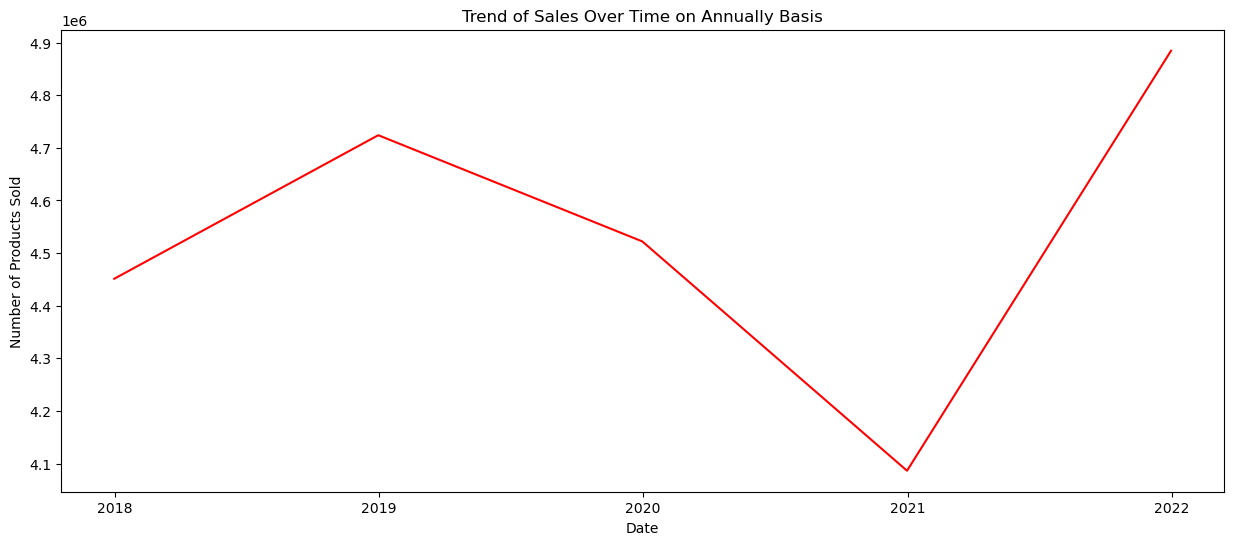

In [11]:
import matplotlib.dates as mdates

# Aggregate sales on a yearly basis
annually_sales = df_train.resample('Y').sum()['num_sold']

# Plot the trend of sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=annually_sales.index, y=annually_sales.values, color='r')
plt.title('Trend of Sales Over Time on Annually Basis')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')

# Set the X-axis ticks to show only the years
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

plt.show()

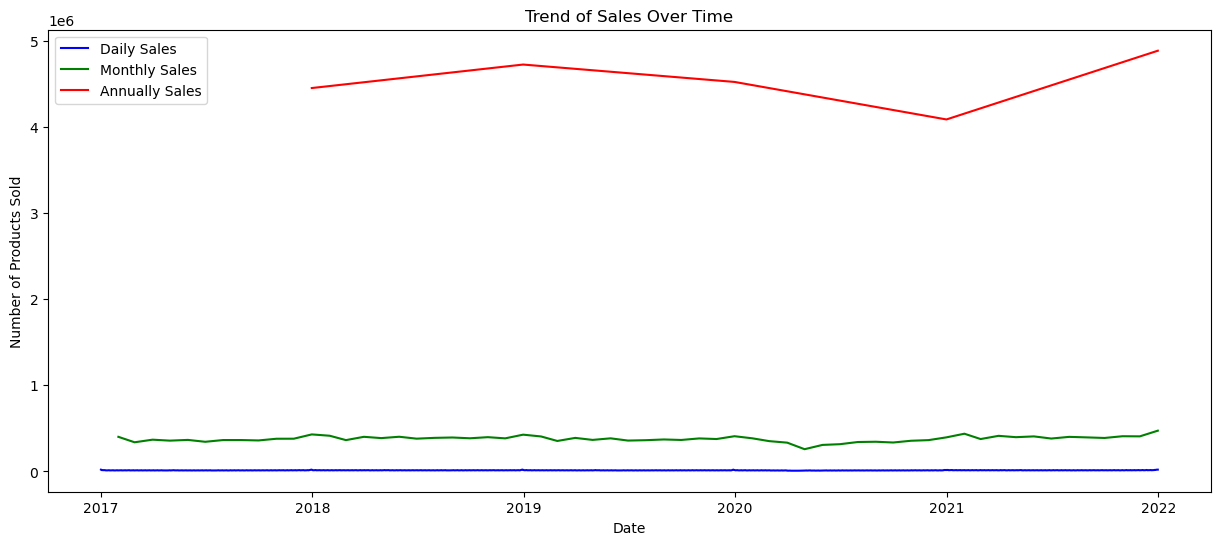

In [12]:
# Combine the above 3 plots into 1 single plot

# Set up the figure and axis
plt.figure(figsize=(15, 6))

# Plot the trend of sales over time on a daily basis
sns.lineplot(x=daily_sales.index, y=daily_sales.values, color='b', label='Daily Sales')

# Plot the trend of sales over time on a monthly basis
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='g', label='Monthly Sales')

# Plot the trend of sales over time on an annual basis
sns.lineplot(x=annually_sales.index, y=annually_sales.values, color='r', label='Annually Sales')

plt.title('Trend of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')

# Set the X-axis ticks to show only the years
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

plt.legend()  # Show the legend to differentiate the lines

plt.show()


## Trend of 7-d,14-d and 30-d rolling means sales over time (by country)

In [13]:
daily_sales = df_train.resample('D').sum()['num_sold']
rolling_7d = daily_sales.rolling(window=7).mean()
rolling_14d = daily_sales.rolling(window=14).mean()
rolling_30d = daily_sales.rolling(window=30).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines', name='Daily Sales'))
fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_7d.values, mode='lines', name='7-day Rolling Mean'))
fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_14d.values, mode='lines', name='14-day Rolling Mean'))
fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_30d.values, mode='lines', name='30-day Rolling Mean'))
fig.update_layout(title='Trend of Sales Over Time with Rolling Mean in All Countries',
                  xaxis_title='Date',
                  yaxis_title='Number of Products Sold',
                  )
fig.show()

Let's filter down into individual country below:

In [14]:
countries = df_train.country.unique()

def plot_daily_sales_by_country(country):

    daily_sales = df_train.query(f"country=='{country}'").resample('D').sum()['num_sold']
    rolling_7d = daily_sales.rolling(window=7).mean()
    rolling_14d = daily_sales.rolling(window=14).mean()
    rolling_30d = daily_sales.rolling(window=30).mean()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines', name='Daily Sales'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_7d.values, mode='lines', name='7-day Rolling Mean'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_14d.values, mode='lines', name='14-day Rolling Mean'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_30d.values, mode='lines', name='30-day Rolling Mean'))
    fig.update_layout(title=f'Trend of Sales Over Time with Rolling Mean in {country}',
                      xaxis_title='Date',
                      yaxis_title='Number of Products Sold',
                      )
    fig.show()

for country in countries:
    plot_daily_sales_by_country(country)

Pretty difficult to tell the differences from each country. So we make a combined plots below:

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

countries = df_train.country.unique()

def plot_daily_sales_by_country(country, traces):

    daily_sales = df_train.query(f"country=='{country}'").resample('D').sum()['num_sold']
    rolling_7d = daily_sales.rolling(window=7).mean()
    rolling_14d = daily_sales.rolling(window=14).mean()
    rolling_30d = daily_sales.rolling(window=30).mean()

    hover_template = f"<b>{country}</b><br>"  # Bold country name as the hover title
    hover_template += "Date: %{x}<br>Number of Products Sold: %{y}<extra></extra>"  # Date and sales values displayed

    traces.append(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines', name=f'{country} - Daily Sales', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_7d.values, mode='lines', name=f'{country} - 7-day Rolling Mean', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_14d.values, mode='lines', name=f'{country} - 14-day Rolling Mean', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_30d.values, mode='lines', name=f'{country} - 30-day Rolling Mean', hovertemplate=hover_template))

# Initialize an empty list to product all the traces
traces = []

# Plot each country's sales data in the same set of traces
for country in countries:
    plot_daily_sales_by_country(country, traces)

# Create the figure with the combined traces
fig = go.Figure(data=traces)

# Update the layout for the entire figure
fig.update_layout(title="Sales Trends with Rolling Mean for Different Countries",
                  xaxis_title="Date",
                  yaxis_title="Number of Products Sold",
                  height=600,
                  width=1000)

fig.show()

By rolling mean, the hierarchy of most sales by country is Canada > Japan > Spain > Estonia > Argentina.



## Trend of 7-d,14-d and 30-d rolling means sales over time (by product)

In [16]:
products = df_train['product'].unique()

def plot_daily_sales_by_product(product):

    daily_sales = df_train.query(f"product=='{product}'").resample('D').sum()['num_sold']
    rolling_7d = daily_sales.rolling(window=7).mean()
    rolling_14d = daily_sales.rolling(window=14).mean()
    rolling_30d = daily_sales.rolling(window=30).mean()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines', name='Daily Sales'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_7d.values, mode='lines', name='7-day Rolling Mean'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_14d.values, mode='lines', name='14-day Rolling Mean'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_30d.values, mode='lines', name='30-day Rolling Mean'))
    fig.update_layout(title=f'Trend of Sales Over Time with Rolling Mean in {product}',
                      xaxis_title='Date',
                      yaxis_title='Number of Products Sold',
                      )
    fig.show()

for product in products:
    plot_daily_sales_by_product(product)

Again, it's pretty difficult to tell the differences from each product. So we make a combined plots below:


In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

stores = df_train.store.unique()

def plot_daily_sales_by_store(store, traces):

    daily_sales = df_train.query(f"store=='{store}'").resample('D').sum()['num_sold']
    rolling_7d = daily_sales.rolling(window=7).mean()
    rolling_14d = daily_sales.rolling(window=14).mean()
    rolling_30d = daily_sales.rolling(window=30).mean()

    hover_template = f"<b>{store}</b><br>"  # Bold store name as the hover title
    hover_template += "Date: %{x}<br>Number of Products Sold: %{y}<extra></extra>"  # Date and sales values displayed

    traces.append(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines', name=f'{store} - Daily Sales', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_7d.values, mode='lines', name=f'{store} - 7-day Rolling Mean', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_14d.values, mode='lines', name=f'{store} - 14-day Rolling Mean', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_30d.values, mode='lines', name=f'{store} - 30-day Rolling Mean', hovertemplate=hover_template))

# Initialize an empty list to store all the traces
traces = []

# Plot each store's sales data in the same set of traces
for store in stores:
    plot_daily_sales_by_store(store, traces)

# Create the figure with the combined traces
fig = go.Figure(data=traces)

# Update the layout for the entire figure
fig.update_layout(title="Sales Trends with Rolling Mean for Different Stores",
                  xaxis_title="Date",
                  yaxis_title="Number of Products Sold",
                  height=600,
                  width=1000)

fig.show()

By rolling mean, the hierarchy of most sales by store is Kagglazon > Kaggle product > Kaggle Learn.

## Trend of 7-d,14-d and 30-d rolling means sales over time (by product)

In [18]:
products = df_train['product'].unique()

def plot_daily_sales_by_product(product):

    daily_sales = df_train.query(f"product=='{product}'").resample('D').sum()['num_sold']
    rolling_7d = daily_sales.rolling(window=7).mean()
    rolling_14d = daily_sales.rolling(window=14).mean()
    rolling_30d = daily_sales.rolling(window=30).mean()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines', name='Daily Sales'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_7d.values, mode='lines', name='7-day Rolling Mean'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_14d.values, mode='lines', name='14-day Rolling Mean'))
    fig.add_trace(go.Scatter(x=daily_sales.index, y=rolling_30d.values, mode='lines', name='30-day Rolling Mean'))
    fig.update_layout(title=f"Trend of Sales Over Time with Rolling Mean in '{product}' product",
                      xaxis_title='Date',
                      yaxis_title='Number of Products Sold',
                      )
    fig.show()

for product in products:
    plot_daily_sales_by_product(product)

Again, it's pretty difficult to tell the differences from each product. So we make a combined plots below:

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

products = df_train['product'].unique()

def plot_daily_sales_by_product(product, traces):

    daily_sales = df_train.query(f"product=='{product}'").resample('D').sum()['num_sold']
    rolling_7d = daily_sales.rolling(window=7).mean()
    rolling_14d = daily_sales.rolling(window=14).mean()
    rolling_30d = daily_sales.rolling(window=30).mean()

    hover_template = f"<b>{product}</b><br>"  # Bold product name as the hover title
    hover_template += "Date: %{x}<br>Number of Products Sold: %{y}<extra></extra>"  # Date and sales values displayed

    traces.append(go.Scatter(x=daily_sales.index, y=daily_sales.values, mode='lines', name=f'{product} - Daily Sales', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_7d.values, mode='lines', name=f'{product} - 7-day Rolling Mean', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_14d.values, mode='lines', name=f'{product} - 14-day Rolling Mean', hovertemplate=hover_template))
    traces.append(go.Scatter(x=daily_sales.index, y=rolling_30d.values, mode='lines', name=f'{product} - 30-day Rolling Mean', hovertemplate=hover_template))
    
# Initialize an empty list to product all the traces
traces = []

# Plot each product's sales data in the same set of traces
for product in products:
    plot_daily_sales_by_product(product, traces)

# Create the figure with the combined traces
fig = go.Figure(data=traces)

# Update the layout for the entire figure
fig.update_layout(title="Sales Trends with Rolling Mean for Different products",
                  xaxis_title="Date",
                  yaxis_title="Number of Products Sold",
                  height=600,
                  width=1200,
                  #legend=dict(x=0, y=-0.2, orientation='h')
                 )

# Set a fixed y-axis range
fig.update_yaxes(range=[0, 6000])

fig.show()

## Trend of Sales Over Time for Each Store in Each Country

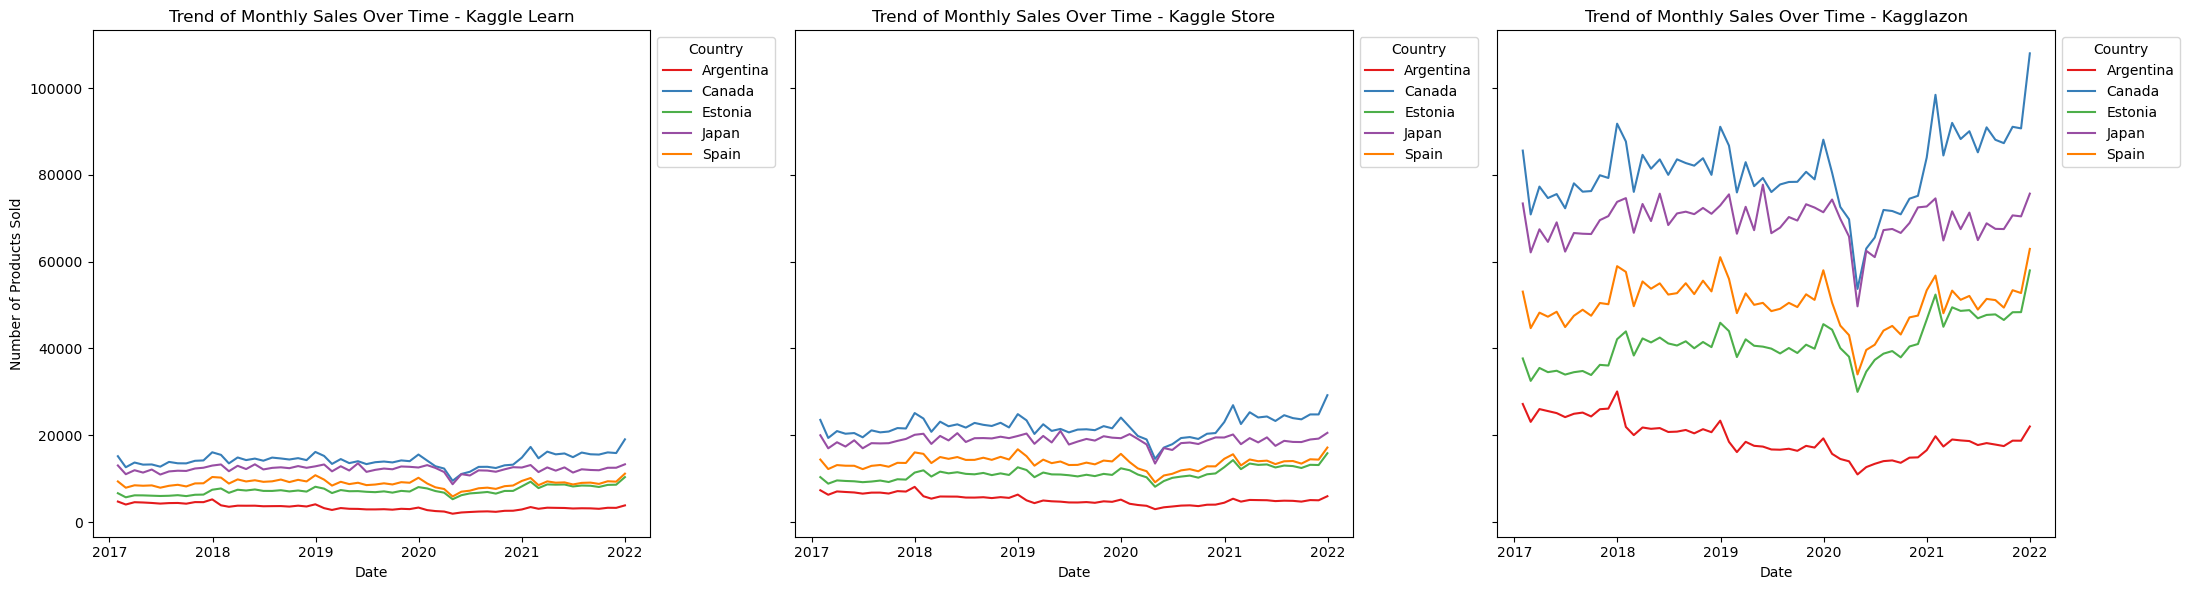

In [20]:
# Aggregate sales on a monthly basis for each store and country
monthly_sales = df_train.groupby(['country', 'store']).resample('M').sum().reset_index()

# Create 1 by 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

# Loop through each store
for idx, store in enumerate(stores):
    filtered_data = monthly_sales.query(f"store == '{store}'")
    
    # Plot the trend of monthly sales over time in the respective subplot
    sns.lineplot(x='date', y='num_sold', hue='country', data=filtered_data, palette='Set1', ax=axes[idx])
    axes[idx].set_title(f'Trend of Monthly Sales Over Time - {store}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Number of Products Sold')
    axes[idx].legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Trend of Sales Over Time for Each Product in Each Country

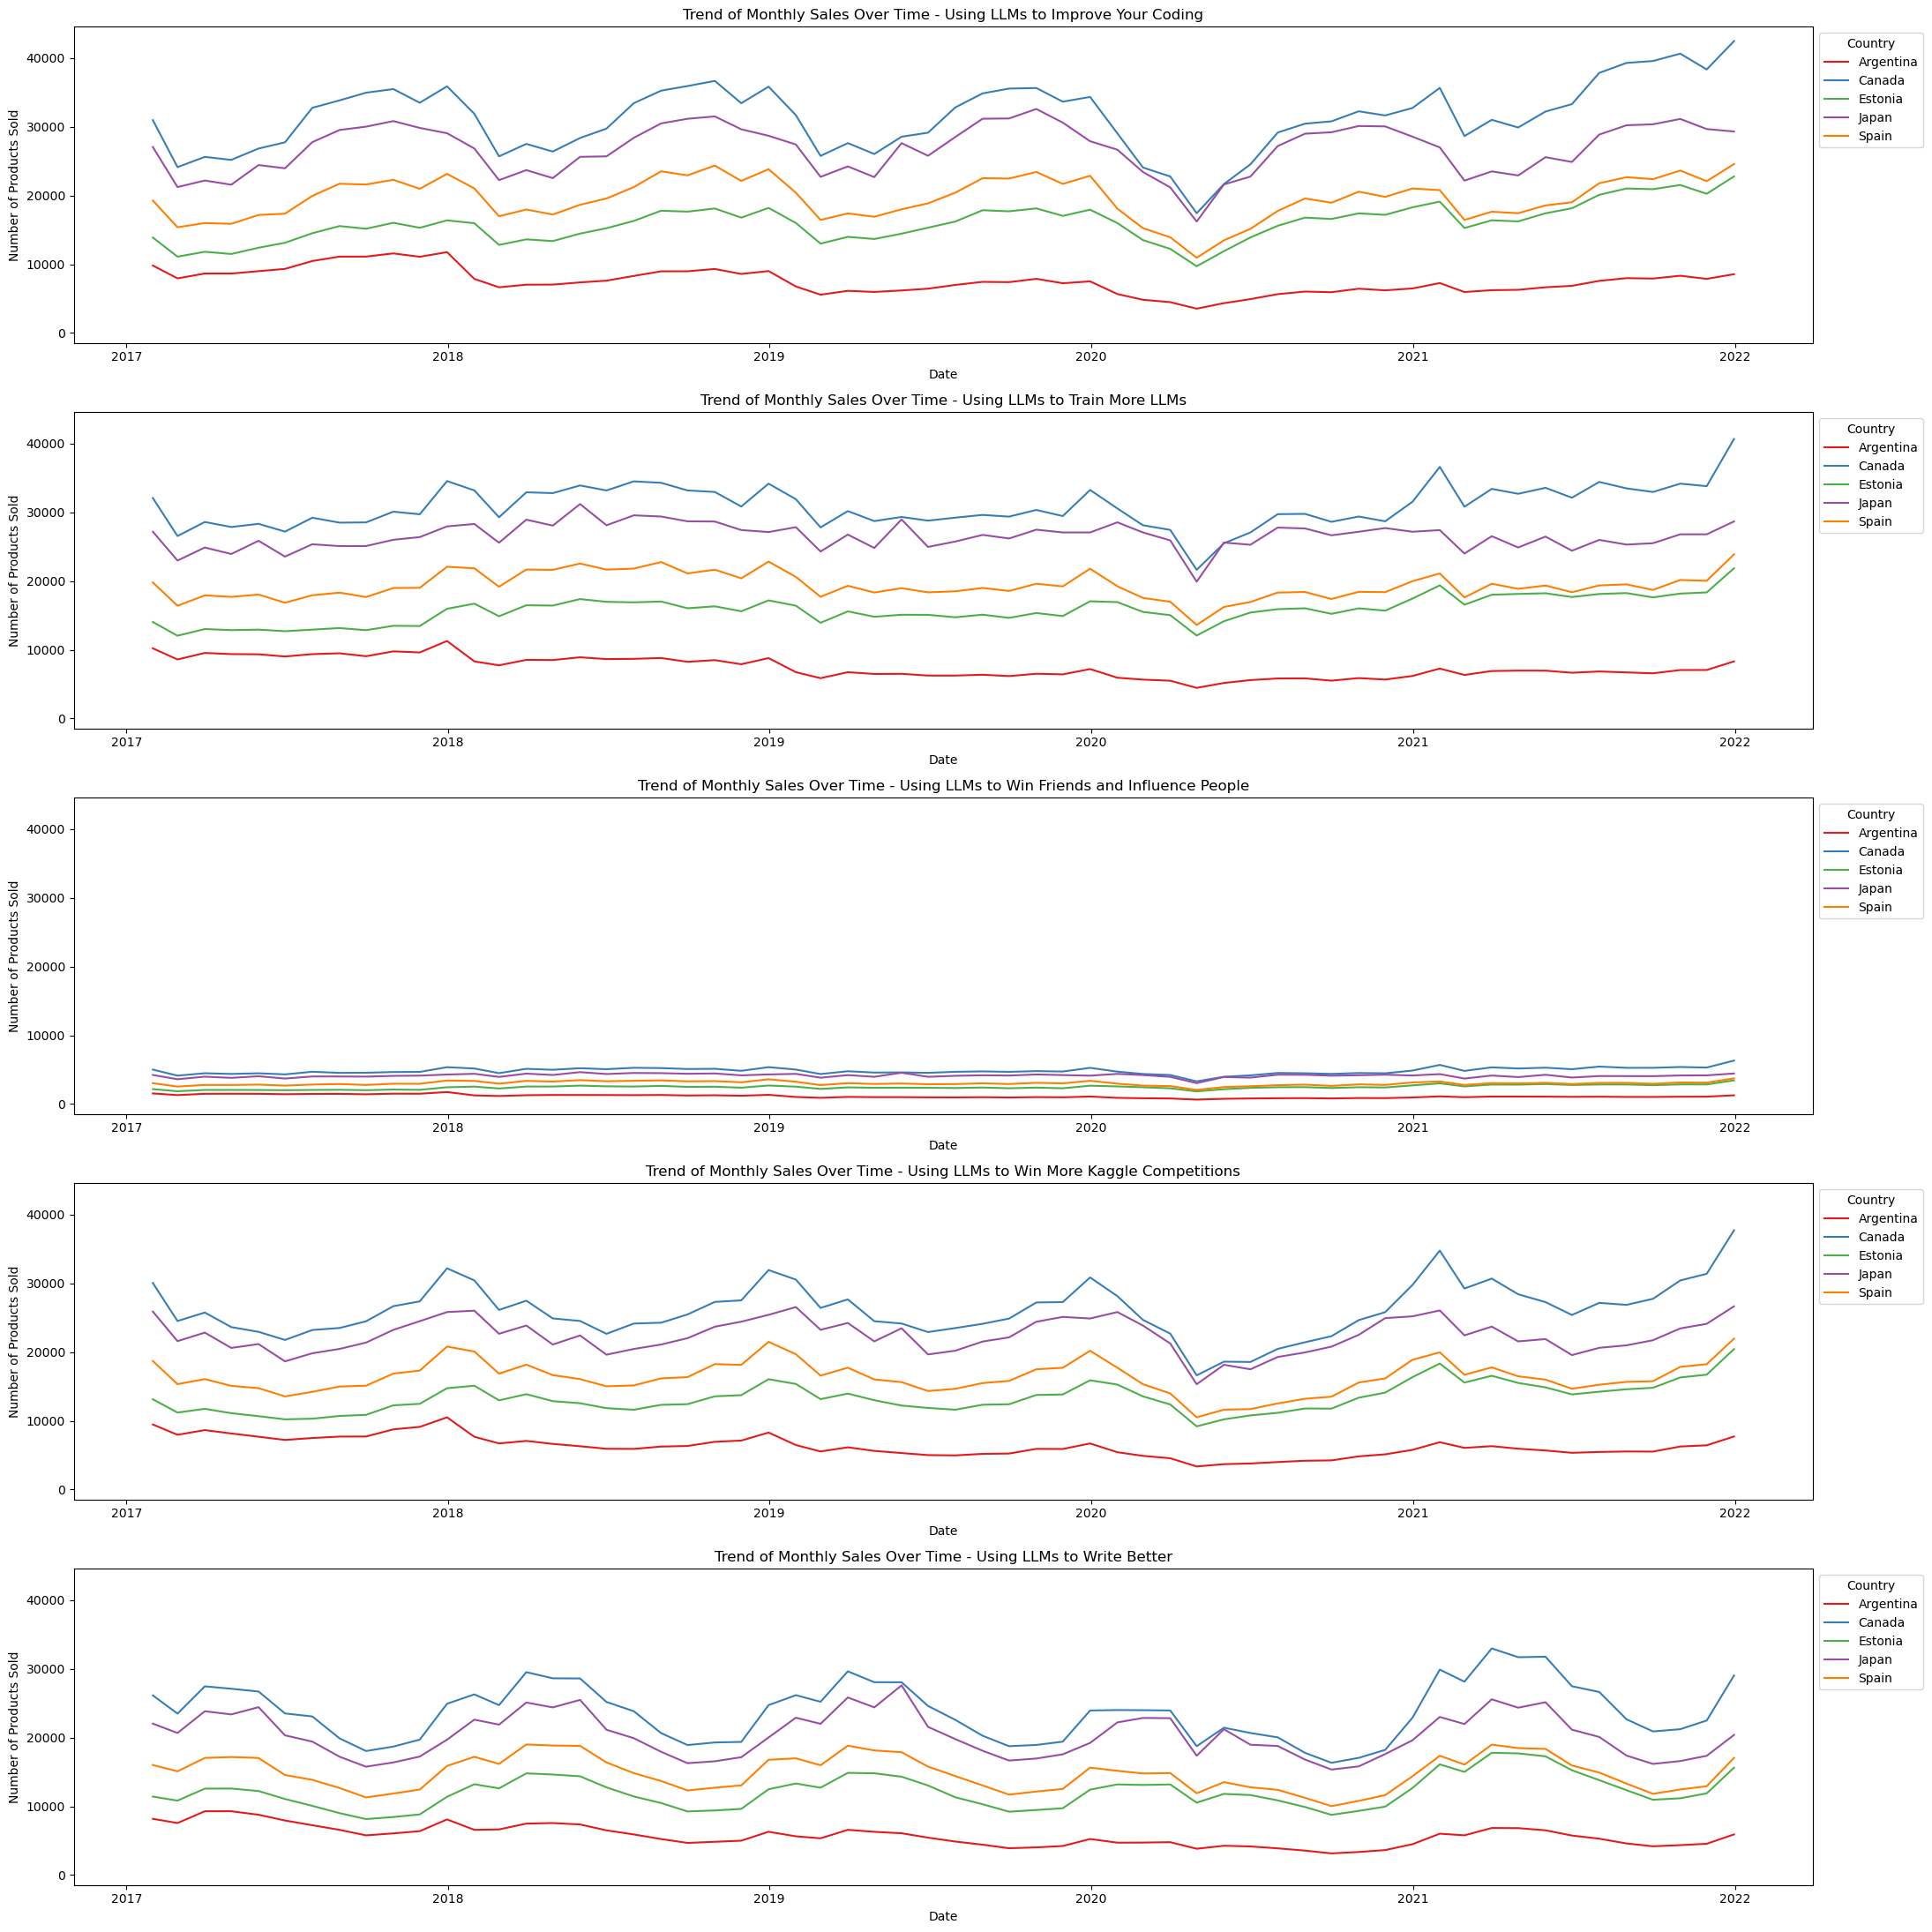

In [21]:
# Aggregate sales on a monthly basis for each product and country
monthly_sales = df_train.groupby(['country', 'product']).resample('M').sum().reset_index()

# Create 5 by 1 subplots
fig, axes = plt.subplots(5, 1, figsize=(22, 22), sharey=True)

# Loop through each store
for idx, product in enumerate(products):
    filtered_data = monthly_sales.query(f"product == '{product}'")
    
    # Plot the trend of monthly sales over time in the respective subplot
    sns.lineplot(x='date', y='num_sold', hue='country', data=filtered_data, palette='Set1', ax=axes[idx])
    axes[idx].set_title(f'Trend of Monthly Sales Over Time - {product}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Number of Products Sold')
    axes[idx].legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Overall trend insights

- There is overall seasonal trend of sales which peaks during Christmas and New Year seasons.
- The hierarchy of most sales by country is Canada > Japan > Spain > Estonia > Argentina.
- The hierarchy of most sales by store is Kagglazon > Kaggle product > Kaggle Learn.
- There is apparent seasonal trend of sales for some of the products like Using LLMs to Improve Your Coding, Using LLMs to Win More Kaggle Competitions and Using LLMs to Write Better, but not so apparent in the other two products. This may be tied to the seasonal promotional at different timing for these 3 products throughtout the year.
- There is obviously some disruptions to sales in 2020 due to the Covid-19 outbreak. Noticable fluctuation in sales from March to June 2020

# Exclude abnormal/skewed time periods from training

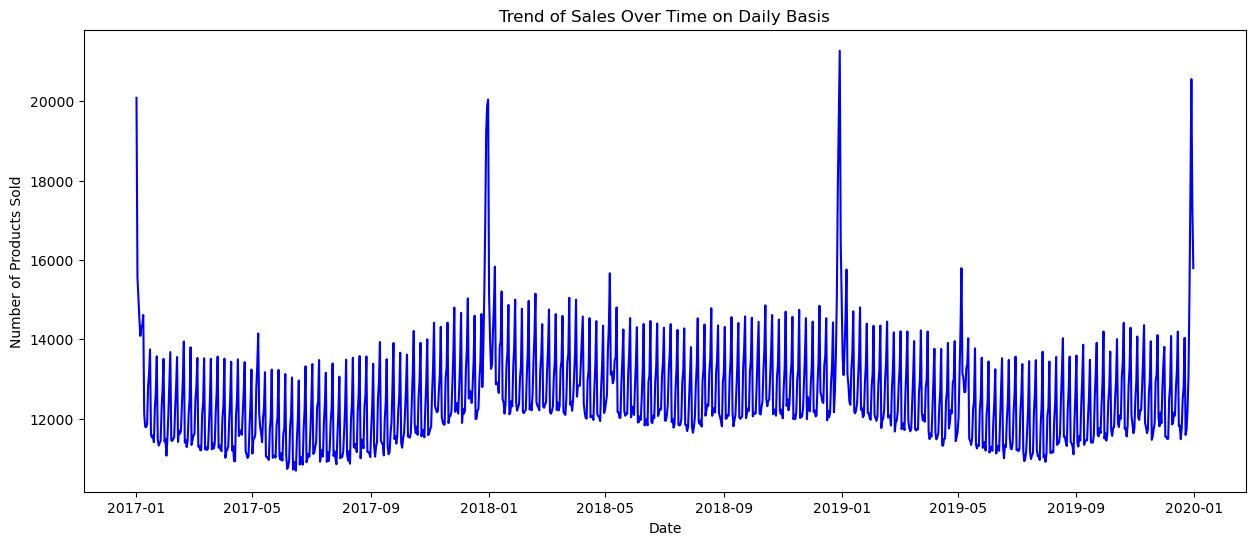

In [22]:
df_train1 = df_train.loc[~((df_train.index>="2020-01-01") & (df_train.index<="2022-12-31"))].copy()
daily_sales1 = df_train1.resample('D').sum()['num_sold']

# Plot the trend of sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=daily_sales1.index, y=daily_sales1.values, color='b')
plt.title('Trend of Sales Over Time on Daily Basis')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.show()

# Feature Engineering

In [23]:
def add_features(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['weekday'] = df.index.dayofweek
    df['month_sin'] = np.sin(df['month']*(2*np.pi/12))
    df['month_cos'] = np.cos(df['month']*(2*np.pi/12))
    df['day_sin'] = np.sin(df['day']*(2*np.pi/12))
    df['day_cos'] = np.cos(df['day']*(2*np.pi/12)) 
    
    years_list = [2017, 2018, 2019, 2020, 2021, 2022]
    holiday_AR = holidays.CountryHoliday('AR', years=years_list)
    holiday_CA = holidays.CountryHoliday('CA', years=years_list)
    holiday_EE = holidays.CountryHoliday('EE', years=years_list)
    holiday_JP = holidays.CountryHoliday('JP', years=years_list)
    holiday_ES = holidays.CountryHoliday('ES', years=years_list)

    holiday_dict = holiday_AR.copy()
    holiday_dict.update(holiday_CA)
    holiday_dict.update(holiday_EE)
    holiday_dict.update(holiday_JP)
    holiday_dict.update(holiday_ES)

    df['holiday_name'] = df.index.map(holiday_dict)
    df['is_holiday'] = np.where(df['holiday_name'].notnull(), 1, 0)
    df['holiday_name'] = df['holiday_name'].fillna('Not Holiday')
    
    # introduce lag features mapped to target variable (not sure it still makes sense after massive 2022 outlier removal)
    if df is df_train1:
        target_map = df['num_sold'].to_dict()
        df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
        df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
        df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    else:
        target_map = df_train1['num_sold'].to_dict()
        df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
        df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
        df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    
    cols_to_drop = ['country', 'store', 'product']
    df = df.drop(columns=cols_to_drop)
    
    return df

In [24]:
df_train1 = add_features(df_train1)
df_test = add_features(df_test)

In [25]:
df_train1.tail()

num_sold  year  month  day  weekday     month_sin  month_cos  \
date                                                                       
2019-12-31       636  2019     12   31        1 -2.449294e-16        1.0   
2019-12-31       652  2019     12   31        1 -2.449294e-16        1.0   
2019-12-31       100  2019     12   31        1 -2.449294e-16        1.0   
2019-12-31       564  2019     12   31        1 -2.449294e-16        1.0   
2019-12-31       431  2019     12   31        1 -2.449294e-16        1.0   

            day_sin   day_cos holiday_name  is_holiday   lag1   lag2   lag3  
date                                                                         
2019-12-31     -0.5 -0.866025  Not Holiday           0  430.0  373.0  372.0  
2019-12-31     -0.5 -0.866025  Not Holiday           0  430.0  373.0  372.0  
2019-12-31     -0.5 -0.866025  Not Holiday           0  430.0  373.0  372.0  
2019-12-31     -0.5 -0.866025  Not Holiday           0  430.0  373.0  372.0  
2019-12-31     -0.5 -0.866025  Not Holiday           0  430.0  373.0  372.0

In [26]:
df_test.head()

year  month  day  weekday  month_sin  month_cos  day_sin  \
date                                                                   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   

             day_cos                         holiday_name  is_holiday  lag1  \
date                                                                          
2022-01-01  0.866025  Año nuevo; New Year's Day; uusaasta           1   NaN   
2022-01-01  0.866025  Año nuevo; New Year's Day; uusaasta           1   NaN   
2022-01-01  0.866025  Año nuevo; New Year's Day; uusaasta           1   NaN   
2022-01-01  0.866025  Año nuevo; New Year's Day; uusaasta           1   NaN   
2022-01-01  0.866025  Año nuevo; New Year's Day; uusaasta           1   NaN   

            lag2   lag3  
date                     
2022-01-01   NaN  400.0  
2022-01-01   NaN  400.0  
2022-01-01   NaN  400.0  
2022-01-01   NaN  400.0  
2022-01-01   NaN  400.0

In [27]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

def encoder(df):
    if df is df_train2:
        df['holiday_name'] = oe.fit_transform(df['holiday_name'].values.reshape(-1,1))
    else:
        df['holiday_name'] = oe.transform(df['holiday_name'].values.reshape(-1,1))
        not_hol_val = oe.transform([['Not Holiday']])[0,0]
        df.loc[df['holiday_name']==-1, 'holiday_name'] = not_hol_val
        
    return df

In [28]:
df_train2 = df_train1.copy()
df_test2 = df_test.copy()
df_train2 = encoder(df_train2)
df_test2 = encoder(df_test.copy())

In [29]:
df_train2.head()

num_sold  year  month  day  weekday  month_sin  month_cos  \
date                                                                    
2017-01-01        63  2017      1    1        6        0.5   0.866025   
2017-01-01        66  2017      1    1        6        0.5   0.866025   
2017-01-01         9  2017      1    1        6        0.5   0.866025   
2017-01-01        59  2017      1    1        6        0.5   0.866025   
2017-01-01        49  2017      1    1        6        0.5   0.866025   

            day_sin   day_cos  holiday_name  is_holiday  lag1  lag2  lag3  
date                                                                       
2017-01-01      0.5  0.866025          47.0           1   NaN   NaN   NaN  
2017-01-01      0.5  0.866025          47.0           1   NaN   NaN   NaN  
2017-01-01      0.5  0.866025          47.0           1   NaN   NaN   NaN  
2017-01-01      0.5  0.866025          47.0           1   NaN   NaN   NaN  
2017-01-01      0.5  0.866025          47.0           1   NaN   NaN   NaN

In [30]:
df_test2.head()

year  month  day  weekday  month_sin  month_cos  day_sin  \
date                                                                   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   
2022-01-01  2022      1    1        5        0.5   0.866025      0.5   

             day_cos  holiday_name  is_holiday  lag1  lag2   lag3  
date                                                               
2022-01-01  0.866025           3.0           1   NaN   NaN  400.0  
2022-01-01  0.866025           3.0           1   NaN   NaN  400.0  
2022-01-01  0.866025           3.0           1   NaN   NaN  400.0  
2022-01-01  0.866025           3.0           1   NaN   NaN  400.0  
2022-01-01  0.866025           3.0           1   NaN   NaN  400.0

# Train / Test Split

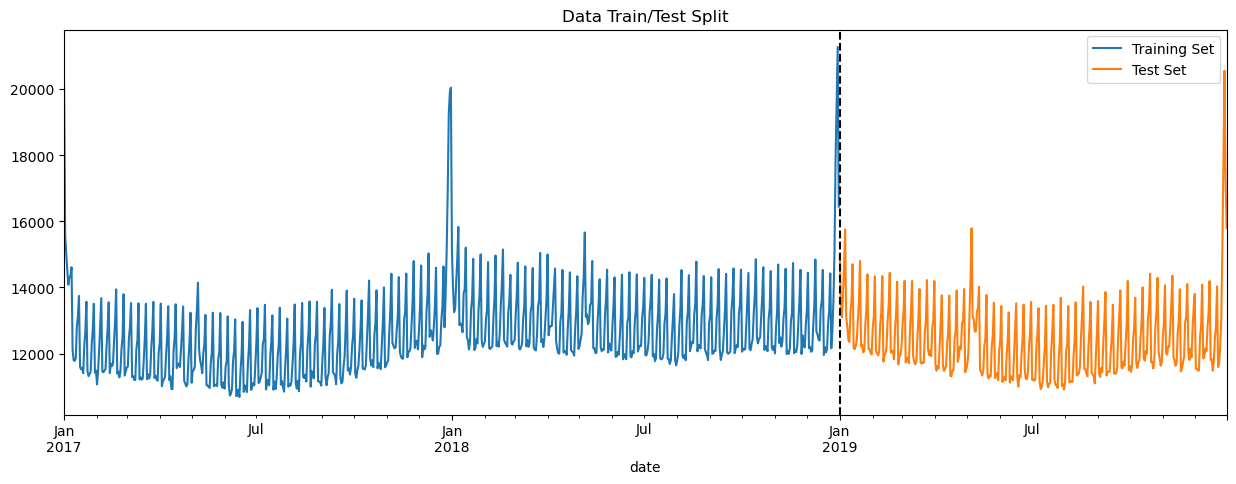

In [31]:
train = df_train2.loc[df_train2.index < '2019-01-01']
test = df_train2.loc[df_train2.index >= '2019-01-01']

sales_train = train.resample('D').sum()['num_sold']
sales_test = test.resample('D').sum()['num_sold']

fig, ax = plt.subplots(figsize=(15, 5))
sales_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
sales_test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2019', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Time Series Cross Validation

In [32]:
df_train2.columns

Index(['num_sold', 'year', 'month', 'day', 'weekday', 'month_sin', 'month_cos',
       'day_sin', 'day_cos', 'holiday_name', 'is_holiday', 'lag1', 'lag2',
       'lag3'],
      dtype='object')

In [33]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df_train2.sort_index()

fold = 0
preds = []
scores = []

for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    
    FEATURES = ['year', 'month', 'day',
       'weekday', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'holiday_name', 'is_holiday', 'lag1', 'lag2', 'lag3'
    ]
    TARGET = 'num_sold'
    
    X_train = train[FEATURES]
    y_train = train[TARGET]
    
    X_val = test[FEATURES]
    y_val = test[TARGET]
    
    reg = XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
    reg.fit(X_train, y_train, 
            eval_set=[(X_train,y_train),(X_val,y_val)],
            verbose=100)
    
    y_pred = reg.predict(X_val)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append(score)

[21:48:32] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:242.78410	validation_1-rmse:249.45261
[100]	validation_0-rmse:188.60512	validation_1-rmse:194.89908
[200]	validation_0-rmse:180.03406	validation_1-rmse:186.73237
[300]	validation_0-rmse:178.82444	validation_1-rmse:185.62838
[400]	validation_0-rmse:178.64615	validation_1-rmse:185.47750
[499]	validation_0-rmse:178.60837	validation_1-rmse:185.45175
[21:48:37] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:244.07061	validation_1-rmse:260.79428
[100]	validation_0-rmse:189.90120	validation_1-rmse:205.32283
[200]	validation_0-rmse:181.33495	validation_1-rmse:195.83298
[300]	validation_0-rmse:180.12996	validation_1-rmse:194.35571
[400]	validation_0-rmse:179.95521	validation_1-rmse:194.10851
[499]	validation_0-rmse:179.92074	validation_1-rmse:194.06393
[21:48:42] WARNING: ..

In [34]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 185.6872
Fold scores:[185.45174536256067, 194.06393276981888, 183.72283707614076, 175.67462647798644, 189.52269981247528]


# Feature Importance

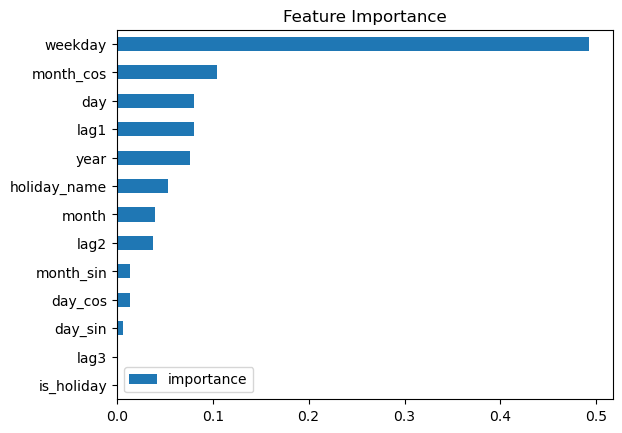

In [35]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Making predictions

In [36]:
X_test = df_test2
pred = reg.predict(X_test)


In [37]:
sub = df_sample.copy()
sub['num_sold'] = pred
sub.to_csv('submission.csv')